<a href="https://colab.research.google.com/github/aravind1910/AdvancedDataStructures/blob/master/Group2_Prediction_Of_Upvotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
% matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import io
train_copy = pd.read_csv(io.BytesIO(uploaded['Train_posts.csv']))

In [2]:
train_copy = pd.read_csv('Train_posts.csv')

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import io
test_copy = pd.read_csv(io.BytesIO(uploaded['Test_posts.csv']))

In [3]:
test_copy = pd.read_csv('Test_posts.csv')

In [4]:
!ls -all


total 16852
drwxr-xr-x 1 root root     4096 Jul 10 08:44 .
drwxr-xr-x 1 root root     4096 Jul 10 08:10 ..
drwxr-xr-x 1 root root     4096 Jun 26 16:26 .config
drwxr-xr-x 1 root root     4096 Jun 26 16:26 sample_data
-rw-r--r-- 1 root root  4673330 Jul 10 08:30 Test_posts.csv
-rw-r--r-- 1 root root 12564851 Jul 10 08:29 Train_posts.csv


In [5]:
print(train_copy.head())

       ID Tag  Reputation  Answers  Username    Views  Upvotes
0   52664   a      3942.0      2.0    155623   7855.0     42.0
1  327662   a     26046.0     12.0     21781  55801.0   1175.0
2  468453   c      1358.0      4.0     56177   8067.0     60.0
3   96996   a       264.0      3.0    168793  27064.0      9.0
4  131465   c      4271.0      4.0    112223  13986.0     83.0


In [7]:
print(test_copy.head())

       ID Tag  Reputation  Answers  Username    Views
0  366953   a      5645.0      3.0     50652  33200.0
1   71864   c     24511.0      6.0     37685   2730.0
2  141692   i       927.0      1.0    135293  21167.0
3  316833   i        21.0      6.0    166998  18528.0
4  440445   i      4475.0     10.0     53504  57240.0


In [8]:
#make a copy of train and test
train=train_copy.copy()


In [9]:
#check if there are any null values
train.isnull().sum() 

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64

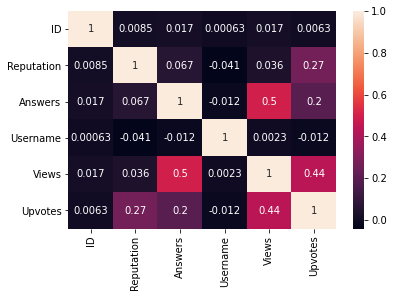

In [10]:
sb.heatmap(train.corr(),annot=True)

In [11]:
train.drop(['ID','Username'],inplace=True,axis=1) #drop id and username as upvotes of indepedent of these columns
train.head()


,Tag,Reputation,Answers,Views,Upvotes
0,a,3942.0,2.0,7855.0,42.0
1,a,26046.0,12.0,55801.0,1175.0
2,c,1358.0,4.0,8067.0,60.0
3,a,264.0,3.0,27064.0,9.0
4,c,4271.0,4.0,13986.0,83.0


In [12]:
#find the values in tag column
print(train['Tag'].unique())
print('________________________________')
print(train['Tag'].value_counts())

['a' 'c' 'r' 'j' 'p' 's' 'h' 'o' 'i' 'x']
________________________________
c    72458
j    72232
p    43407
i    32400
a    31695
s    23323
h    20564
o    14546
r    12442
x     6978
Name: Tag, dtype: int64


   Tag  Reputation  Answers    Views  Upvotes
0    0      3942.0      2.0   7855.0     42.0
1    0     26046.0     12.0  55801.0   1175.0
2    1      1358.0      4.0   8067.0     60.0
3    0       264.0      3.0  27064.0      9.0
4    1      4271.0      4.0  13986.0     83.0


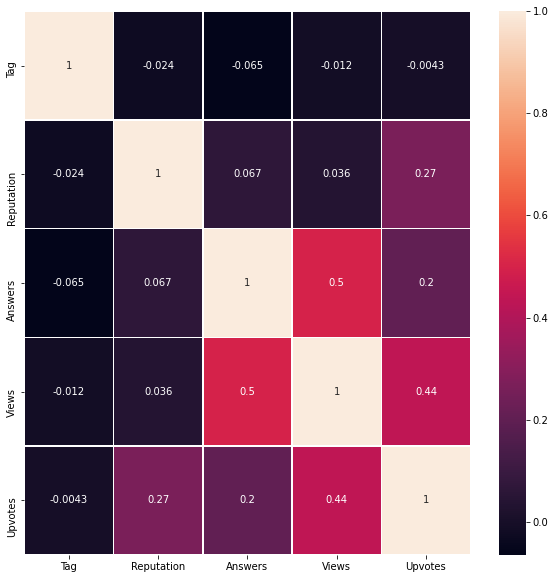

In [13]:
#convert categorical values into numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
training1 = train.copy()
training1['Tag'] = le.fit_transform(train['Tag'])

print(training1.head())

fig, ax = plt.subplots(figsize=(10,10))  
sb.heatmap(training1.corr(),annot=True,linewidths=0.5,ax=ax)

In [14]:
columns = ['Reputation',	'Answers',	'Views',	'Tag']
X = training1[columns]
Y = training1['Upvotes'] #output
print(X)
print('_____________________')
print(Y)

        Reputation  Answers    Views  Tag
0           3942.0      2.0   7855.0    0
1          26046.0     12.0  55801.0    0
2           1358.0      4.0   8067.0    1
3            264.0      3.0  27064.0    0
4           4271.0      4.0  13986.0    1
...            ...      ...      ...  ...
330040        36.0      2.0   1063.0    1
330041      1649.0      2.0  23319.0    1
330042      6178.0      2.0   2453.0    1
330043        89.0      2.0   2107.0    4
330044      2001.0      4.0   2554.0    4

[330045 rows x 4 columns]
_____________________
0           42.0
1         1175.0
2           60.0
3            9.0
4           83.0
           ...  
330040       0.0
330041      73.0
330042      15.0
330043       3.0
330044      37.0
Name: Upvotes, Length: 330045, dtype: float64


In [15]:
#divide into 80% train data and 20% test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [16]:
X_train.head()

,Reputation,Answers,Views,Tag
98354,463.0,7.0,100755.0,0
115120,2732.0,1.0,12944.0,6
63395,568.0,2.0,41692.0,1
166919,1098.0,5.0,17390.0,0
243595,712.0,3.0,9838.0,7


In [17]:
test_copy.head()
test = test_copy.copy()
test.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


In [18]:
test.isnull().sum() 

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
dtype: int64

In [19]:
test.drop(['ID','Username'],inplace=True,axis=1) #drop id and username as upvotes is indepedent of these columns
test.head()

,Tag,Reputation,Answers,Views
0,a,5645.0,3.0,33200.0
1,c,24511.0,6.0,2730.0
2,i,927.0,1.0,21167.0
3,i,21.0,6.0,18528.0
4,i,4475.0,10.0,57240.0


In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
testing1 = test.copy()
testing1['Tag'] = le.fit_transform(test['Tag'])
print(testing1.head())

   Tag  Reputation  Answers    Views
0    0      5645.0      3.0  33200.0
1    1     24511.0      6.0   2730.0
2    3       927.0      1.0  21167.0
3    3        21.0      6.0  18528.0
4    3      4475.0     10.0  57240.0


**Linear Regression**

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
Y_pred = regressor.predict(X_test)
Y_pred

array([ 220.14699049, -302.30385763, -713.1906449 , ..., 1086.05384935,
       -286.71790999, -170.69335255])

In [23]:
print(regressor.coef_) #slope

[ 3.49031652e-02 -4.28504150e+01  2.04860889e-02  6.61280839e+00]


In [24]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.3248005744065967

**Decision Tree**

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

In [26]:
#create decision tree with depth 3, max depth=40
decision_tree =DecisionTreeRegressor(max_depth=20)
decision_tree.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=20,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [27]:
y_pred=decision_tree.predict(X_test)

In [28]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred)

0.8348590136374704

**Random Forest**

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [30]:
rf = RandomForestRegressor(n_estimators=100, random_state= 10)

In [31]:
rf.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [32]:
prediction = rf.predict(X_test)

In [33]:
testing1 = testing1[['Reputation','Answers', 'Views' , 'Tag']]
print( testing1.head())

   Reputation  Answers    Views  Tag
0      5645.0      3.0  33200.0    0
1     24511.0      6.0   2730.0    1
2       927.0      1.0  21167.0    3
3        21.0      6.0  18528.0    3
4      4475.0     10.0  57240.0    3


In [34]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred)

0.8348590136374704

In [35]:
final1 = rf.predict(testing1)
final1 = final1.astype('int64')
print(final1)

[227  75  48 ...  80  16  30]


**Polynomial Regression**

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly_regre = PolynomialFeatures(degree =2 , interaction_only=False,include_bias = True)
X_poly = poly_regre.fit_transform(X_train)
lin_reg = LinearRegression()
lin_reg.fit(X_poly,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
from sklearn.metrics import r2_score
pred = poly_regre.fit_transform(X_test)
pred_val = lin_reg.predict(pred)
print(r2_score(Y_test,pred_val))

0.9031187210588488


In [38]:
test_data = poly_regre.fit_transform(testing1)
final2 = lin_reg.predict(test_data)
final2 = final2.astype('int64')
print(final2)

[216 148  17 ...  60  11 -10]
